In [1]:
import numpy as np
import pandas as pd
import ptitprince as pt
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

# import data

In [61]:
raw_t0 = pd.read_excel('C:/Users/u0117545/Documents/GitHub/ULIFT_BC/Output/MoveQual_aff.xlsx', sheet_name = 'T0')
raw_t1 = pd.read_excel('C:/Users/u0117545/Documents/GitHub/ULIFT_BC/Output/MoveQual_aff.xlsx', sheet_name = 'T1')
print('No. of baseline: {}, No. of follow-up: {}'.format(len(raw_t0), len(raw_t1)))

No. of baseline: 36, No. of follow-up: 45


In [62]:
# find participants that have T0 and T1 data 

pp_t0 = raw_t0.iloc[:, 0:3].drop('trial', axis = 1)
pp_t1 = raw_t1.iloc[:, 0:3].drop('trial', axis = 1)
pp_list = pd.merge(pp_t0, pp_t1, on='ppID')
pp_list = pp_list.drop(['time_x', 'time_y'], axis = 1)
print(pp_list)

#i = pp_list.loc[pp_list['ppID'] == 'BC_013'].index
#pp_list = pp_list.drop(i)

      ppID
0   BC_011
1   BC_012
2   BC_013
3   BC_014
4   BC_015
5   BC_016
6   BC_017
7   BC_018
8   BC_019
9   BC_020
10  BC_023
11  BC_026
12  BC_027
13  BC_029
14  BC_031
15  BC_032
16  BC_033
17  BC_034
18  BC_035
19  BC_036
20  BC_037
21  BC_038
22  BC_039
23  BC_041
24  BC_042
25  BC_043
26  BC_044
27  BC_045
28  BC_046
29  BC_047
30  BC_048
31  BC_049
32  BC_050


In [63]:
# only retain the participants with both T0 and T1 data
raw_t0 = pd.merge(raw_t0, pp_list, on='ppID')
raw_t1 = pd.merge(raw_t1, pp_list, on='ppID')

assert len(raw_t0) == len(raw_t1)

raw = pd.concat([raw_t0, raw_t1], axis=0, ignore_index=True)
raw.head()

ppID    trial time  lyapExp_x  lyapExp_y  lyapExp_z  lyapExp_res  \
0  BC_011  F_L_001   T0   3.405026   2.171951   3.706032     4.932879   
1  BC_012  F_R_001   T0   2.713225   3.103206   2.870463     3.473117   
2  BC_013  F_L_001   T0   5.894997   2.481606   3.474644     2.997241   
3  BC_014  F_R_001   T0   3.401100   1.254291   2.422205     2.741568   
4  BC_015  F_R_001   T0   2.887995   2.106477   3.688549     0.674435   

   sampen_x  sampen_y  sampen_z  ...     reg_z   reg_res     rms_x     rms_y  \
0  0.669055  0.625893  0.562903  ...  0.828566  0.615961  2.163371  2.773121   
1  1.017684  1.243465  0.689223  ...  0.772203  0.480627  2.552507  1.736760   
2  1.263056  1.213799  0.667468  ...  0.472355  0.232062  1.408135  1.144268   
3  0.811370  0.720676  0.437278  ...  0.800732  0.653517  2.570765  2.507814   
4  0.820862  0.761647  0.667571  ...  0.814766  0.454826  2.032421  1.382022   

      rms_z   rms_res    rmsr_x    rmsr_y    rmsr_z    LDLJ_A  
0  2.911987  4.861625  0.473781  0.607317  0.637729 -6.483206  
1  3.725516  5.040381  0.527541  0.358946  0.769973 -7.067763  
2  2.083361  2.915511  0.509693  0.414182  0.754100 -8.265346  
3  4.105837  5.698095  0.471277  0.459737  0.752689 -6.369987  
4  2.704464  3.852422  0.556153  0.378177  0.740051 -6.628168  

[5 rows x 25 columns]

### create datafram with index

In [64]:
df = raw.iloc[0:,1:]
df.index = raw.iloc[0:,0]
df.head()

trial time  lyapExp_x  lyapExp_y  lyapExp_z  lyapExp_res  sampen_x  \
ppID                                                                           
BC_011  F_L_001   T0   3.405026   2.171951   3.706032     4.932879  0.669055   
BC_012  F_R_001   T0   2.713225   3.103206   2.870463     3.473117  1.017684   
BC_013  F_L_001   T0   5.894997   2.481606   3.474644     2.997241  1.263056   
BC_014  F_R_001   T0   3.401100   1.254291   2.422205     2.741568  0.811370   
BC_015  F_R_001   T0   2.887995   2.106477   3.688549     0.674435  0.820862   

        sampen_y  sampen_z  sampen_res  ...     reg_z   reg_res     rms_x  \
ppID                                    ...                                 
BC_011  0.625893  0.562903    0.951037  ...  0.828566  0.615961  2.163371   
BC_012  1.243465  0.689223    1.023576  ...  0.772203  0.480627  2.552507   
BC_013  1.213799  0.667468    1.210363  ...  0.472355  0.232062  1.408135   
BC_014  0.720676  0.437278    0.819376  ...  0.800732  0.653517  2.570765   
BC_015  0.761647  0.667571    1.110880  ...  0.814766  0.454826  2.032421   

           rms_y     rms_z   rms_res    rmsr_x    rmsr_y    rmsr_z    LDLJ_A  
ppID                                                                          
BC_011  2.773121  2.911987  4.861625  0.473781  0.607317  0.637729 -6.483206  
BC_012  1.736760  3.725516  5.040381  0.527541  0.358946  0.769973 -7.067763  
BC_013  1.144268  2.083361  2.915511  0.509693  0.414182  0.754100 -8.265346  
BC_014  2.507814  4.105837  5.698095  0.471277  0.459737  0.752689 -6.369987  
BC_015  1.382022  2.704464  3.852422  0.556153  0.378177  0.740051 -6.628168  

[5 rows x 24 columns]

In [66]:
# Statistical anlysis
### Pre-op vs Post-op on 20 participants as a first analysis method

In general, there appears to be no differences in movement quality before an after surgery on group level

# Run the analysis again. But remove the participants that had perceived disability pre-operatively

N = 26 op dit moment

In [68]:
raw_dash_vas = pd.read_csv("C:\\Users\\u0117545\\KU Leuven\\An De Groef - DATA\\VAS+QuickDASH\\UPLIFTBC-QuickDASH_DATA_2022-12-08.csv",
                   sep=';')
raw_dash_vas.head()

record_id         redcap_event_name  quickdash_1  quickdash_2  quickdash_3  \
0    BC_001  t0_baseline_presur_arm_1          1.0          1.0          1.0   
1    BC_001  t1_1_month_postsur_arm_1          1.0          1.0          1.0   
2    BC_001  t2_1_month_postrad_arm_1          1.0          1.0          1.0   
3    BC_002  t0_baseline_presur_arm_1          1.0          1.0          1.0   
4    BC_002  t1_1_month_postsur_arm_1          2.0          3.0          1.0   

   quickdash_4  quickdash_5  quickdash_6  quickdash_7  quickdash_8  \
0          1.0          1.0          1.0          1.0          1.0   
1          1.0          1.0          1.0          1.0          1.0   
2          1.0          1.0          1.0          1.0          1.0   
3          1.0          1.0          1.0          1.0          1.0   
4          3.0          1.0          3.0          1.0          2.0   

   quickdash_9  quickdash_10  quickdash_11  pain_score  
0          1.0           1.0           1.0         0.0  
1          1.0           1.0           1.0         0.0  
2          1.0           1.0           1.0         0.0  
3          1.0           1.0           1.0         0.0  
4          2.0           1.0           1.0         1.0

In [69]:
# only retain T0 of the dash scores 
raw_dash = raw_dash_vas.drop('pain_score', axis=1)
idx = raw_dash['redcap_event_name'].str.contains('t0')
mask = np.where(idx)[0]
raw_dash = raw_dash.iloc[mask]
raw_dash

record_id         redcap_event_name  quickdash_1  quickdash_2  \
0      BC_001  t0_baseline_presur_arm_1          1.0          1.0   
3      BC_002  t0_baseline_presur_arm_1          1.0          1.0   
6      BC_003  t0_baseline_presur_arm_1          2.0          1.0   
9      BC_004  t0_baseline_presur_arm_1          4.0          3.0   
10     BC_005  t0_baseline_presur_arm_1          3.0          2.0   
13     BC_006  t0_baseline_presur_arm_1          1.0          1.0   
15     BC_007  t0_baseline_presur_arm_1          5.0          4.0   
17     BC_008  t0_baseline_presur_arm_1          3.0          2.0   
19     BC_009  t0_baseline_presur_arm_1          1.0          1.0   
22     BC_010  t0_baseline_presur_arm_1          1.0          1.0   
24     BC_011  t0_baseline_presur_arm_1          1.0          1.0   
27     BC_012  t0_baseline_presur_arm_1          NaN          NaN   
29     BC_013  t0_baseline_presur_arm_1          1.0          1.0   
31     BC_014  t0_baseline_presur_arm_1          3.0          2.0   
35     BC_015  t0_baseline_presur_arm_1          2.0          1.0   
38     BC_016  t0_baseline_presur_arm_1          1.0          1.0   
40     BC_017  t0_baseline_presur_arm_1          1.0          1.0   
42     BC_018  t0_baseline_presur_arm_1          3.0          1.0   
44     BC_019  t0_baseline_presur_arm_1          3.0          1.0   
46     BC_020  t0_baseline_presur_arm_1          1.0          3.0   
48     BC_021  t0_baseline_presur_arm_1          1.0          2.0   
50     BC_022  t0_baseline_presur_arm_1          1.0          1.0   
51     BC_023  t0_baseline_presur_arm_1          1.0          1.0   
53     BC_024  t0_baseline_presur_arm_1          4.0          1.0   
56     BC_025  t0_baseline_presur_arm_1          2.0          2.0   
58     BC_026  t0_baseline_presur_arm_1          2.0          2.0   
60     BC_027  t0_baseline_presur_arm_1          3.0          2.0   
62     BC_028  t0_baseline_presur_arm_1          NaN          NaN   
63     BC_029  t0_baseline_presur_arm_1          1.0          3.0   
65     BC_030  t0_baseline_presur_arm_1          2.0          2.0   
67     BC_031  t0_baseline_presur_arm_1          3.0          3.0   
69     BC_032  t0_baseline_presur_arm_1          1.0          1.0   
71     BC_033  t0_baseline_presur_arm_1          1.0          1.0   
73     BC_034  t0_baseline_presur_arm_1          1.0          1.0   
75     BC_035  t0_baseline_presur_arm_1          2.0          1.0   
77     BC_036  t0_baseline_presur_arm_1          1.0          1.0   
79     BC_037  t0_baseline_presur_arm_1          1.0          2.0   
81     BC_038  t0_baseline_presur_arm_1          2.0          1.0   
83     BC_039  t0_baseline_presur_arm_1          1.0          1.0   
85     BC_040  t0_baseline_presur_arm_1          1.0          5.0   
87     BC_041  t0_baseline_presur_arm_1          1.0          1.0   
89     BC_042  t0_baseline_presur_arm_1          1.0          1.0   
90     BC_043  t0_baseline_presur_arm_1          2.0          3.0   
92     BC_044  t0_baseline_presur_arm_1          2.0          1.0   
94     BC_045  t0_baseline_presur_arm_1          1.0          1.0   
96     BC_046  t0_baseline_presur_arm_1          1.0          1.0   
99     BC_048  t0_baseline_presur_arm_1          NaN          NaN   
101    BC_049  t0_baseline_presur_arm_1          NaN          NaN   
103    BC_050  t0_baseline_presur_arm_1          NaN          NaN   
105    BC_051  t0_baseline_presur_arm_1          NaN          NaN   
107    BC_052  t0_baseline_presur_arm_1          NaN          NaN   
108    BC_053  t0_baseline_presur_arm_1          2.0          2.0   
110    BC_054  t0_baseline_presur_arm_1          1.0          1.0   
112    BC_055  t0_baseline_presur_arm_1          NaN          NaN   
113    BC_056  t0_baseline_presur_arm_1          3.0          2.0   
114    BC_057  t0_baseline_presur_arm_1          NaN          NaN   
115    BC_047  t0_baseline_presur_arm_1          2.0          1.0   

 

In [70]:
# remove participants with more than 2 NaNs
# Remove rows with missing values
print("Before removing rows with missing data: {} rows".format(len(raw_dash)))
df_dash = raw_dash.dropna(thresh=raw_dash.shape[1]-1, axis=0)
print("After removing rows with missing data: {} rows".format(len(df_dash)))

som = df_dash.iloc[:,2:].sum(axis='columns')
col_n_counts = np.sum(df_dash.applymap(lambda x: 0 if pd.isnull(x) else 1), axis=1)-2
complete = col_n_counts.apply(lambda x:  x >= 10 )

total_score = ((som/col_n_counts)-1) * 25

print('Average score over all participants and timepoints = {}'.format(np.mean(total_score)))
print('Maximum and minumum scores are {} & {} respectively'.format(total_score.max(), total_score.min()))

Before removing rows with missing data: 57 rows
After removing rows with missing data: 48 rows
Average score over all participants and timepoints = 8.806818181818178
Maximum and minumum scores are 56.81818181818182 & 0.0 respectively


In [71]:
#set-up dataframe for total dash scores. 
d = {'ppID': df_dash['record_id'],
    'total_score': total_score}
df_totaldash = pd.DataFrame(data=d)

In [73]:
# find the people with a dash score higher than 15
idx = df_totaldash['total_score'] < 15
mask = np.where(idx)[0]
prePain = df_totaldash.iloc[mask]
prePain = prePain.drop('total_score', axis =1 )

In [76]:
print('No. of baseline without pain: {}'.format(len(prePain)))   

No. of baseline without pain: 38


In [78]:
pp_list_noPain = pd.merge(prePain, pp_list, on='ppID')
print(pp_list_noPain)
print('No. of people with baseline measure and without baseline perceived disability: {}'.format(len(pp_list_noPain)))

      ppID
0   BC_011
1   BC_013
2   BC_014
3   BC_015
4   BC_016
5   BC_017
6   BC_018
7   BC_019
8   BC_023
9   BC_026
10  BC_029
11  BC_031
12  BC_032
13  BC_033
14  BC_034
15  BC_035
16  BC_036
17  BC_037
18  BC_038
19  BC_039
20  BC_041
21  BC_042
22  BC_044
23  BC_045
24  BC_046
25  BC_047
No. of people with baseline measure and without baseline perceived disability: 26


In [79]:
t0_noPain = pd.merge(raw_t0, pp_list_noPain, on='ppID')
t1_noPain = pd.merge(raw_t1, pp_list_noPain, on='ppID')

assert len(t0_noPain) == len(t1_noPain) == len(pp_list_noPain)

raw_noPain = pd.concat([t0_noPain, t1_noPain], axis=0, ignore_index=True)
raw_noPain.head()

ppID    trial time  lyapExp_x  lyapExp_y  lyapExp_z  lyapExp_res  \
0  BC_011  F_L_001   T0   3.405026   2.171951   3.706032     4.932879   
1  BC_013  F_L_001   T0   5.894997   2.481606   3.474644     2.997241   
2  BC_014  F_R_001   T0   3.401100   1.254291   2.422205     2.741568   
3  BC_015  F_R_001   T0   2.887995   2.106477   3.688549     0.674435   
4  BC_016  F_L_001   T0   1.502497   2.487032   3.376438     2.743834   

   sampen_x  sampen_y  sampen_z  ...     reg_z   reg_res     rms_x     rms_y  \
0  0.669055  0.625893  0.562903  ...  0.828566  0.615961  2.163371  2.773121   
1  1.263056  1.213799  0.667468  ...  0.472355  0.232062  1.408135  1.144268   
2  0.811370  0.720676  0.437278  ...  0.800732  0.653517  2.570765  2.507814   
3  0.820862  0.761647  0.667571  ...  0.814766  0.454826  2.032421  1.382022   
4  0.889762  1.003761  0.664440  ...  0.823236  0.694873  1.944002  2.206762   

      rms_z   rms_res    rmsr_x    rmsr_y    rmsr_z    LDLJ_A  
0  2.911987  4.861625  0.473781  0.607317  0.637729 -6.483206  
1  2.083361  2.915511  0.509693  0.414182  0.754100 -8.265346  
2  4.105837  5.698095  0.471277  0.459737  0.752689 -6.369987  
3  2.704464  3.852422  0.556153  0.378177  0.740051 -6.628168  
4  3.410972  4.771970  0.431642  0.489984  0.757364 -6.985151  

[5 rows x 25 columns]

In [94]:
%store t1_noPain

Stored 't1_noPain' (DataFrame)


In [80]:
df_noPain = raw_noPain.iloc[0:,1:]
df_noPain.index = raw_noPain.iloc[0:,0]
len(df_noPain)

52

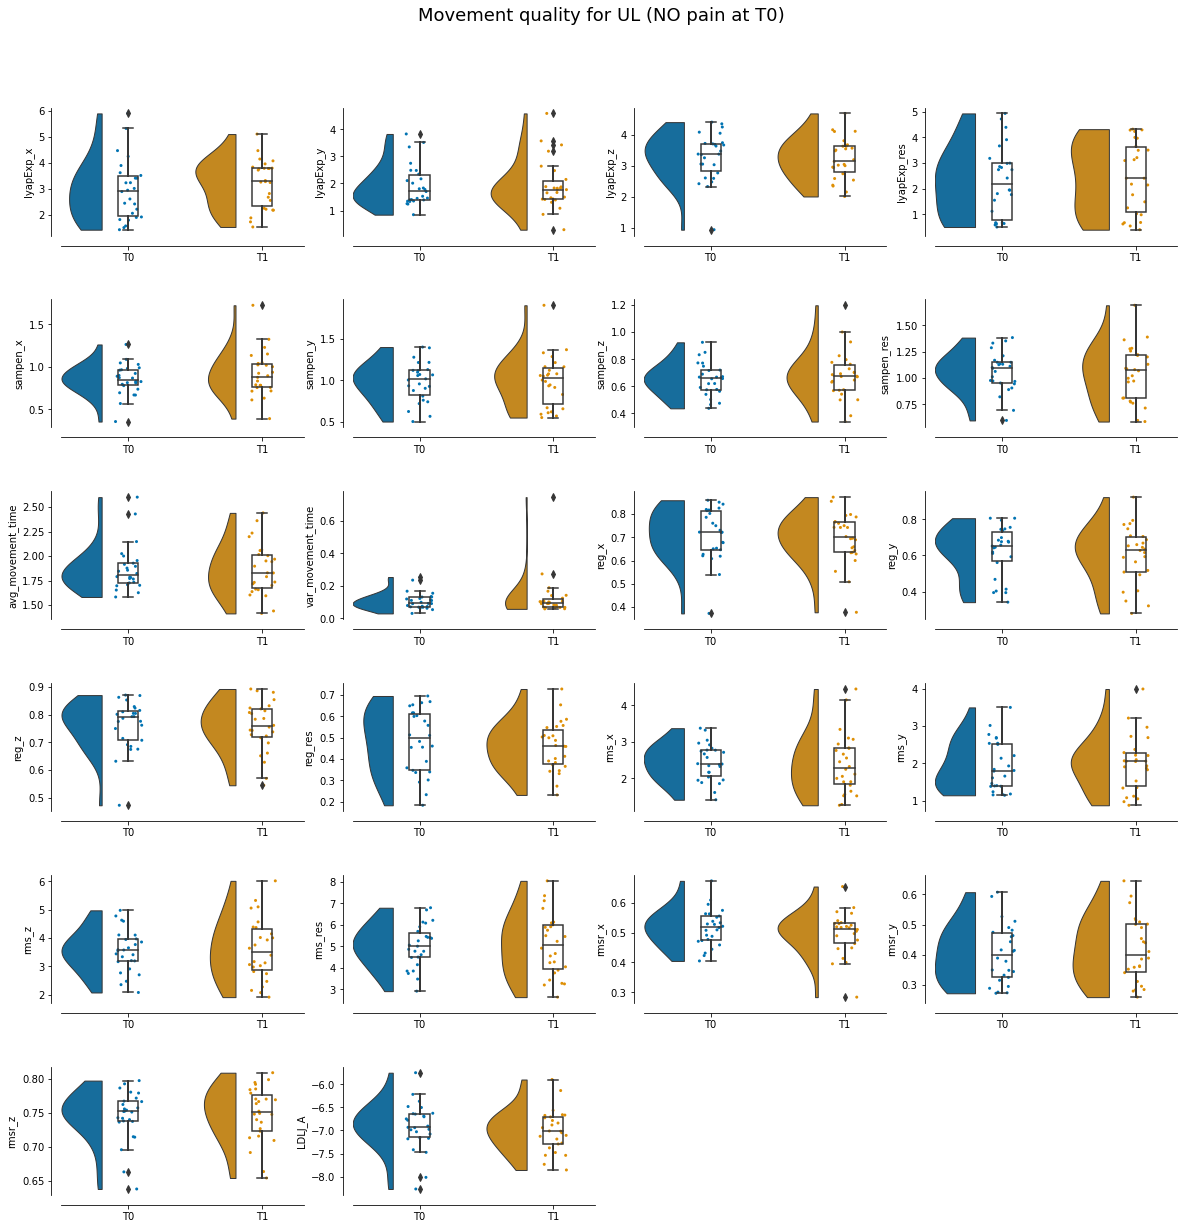

In [81]:
X = df_noPain.drop(['trial','time'], axis = 1)
# find minimium required rows given we want 5 columns
ncols = 4
nrows = len(X.columns) // ncols + (len(X.columns) % ncols > 0)
dx = "time"; ort = "v"; pal = 'colorblind'; sigma = .6; viol = .6; mv = .0

f = plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Movement quality for UL (NO pain at T0)", fontsize=18, y=0.95)

f.tight_layout();
offset = 0.1;

for n, columns in enumerate(X.columns):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
    
    # filter df and plot ticker on the new subplot axis
    #df[df["ticker"] == ticker].plot(ax=ax)
     
    pt.RainCloud(x = dx, y = columns, data = df_noPain, ax = ax,
                palette = pal, bw = sigma, width_viol = viol,
                orient = ort, move = mv)
    sns.despine(offset=10)
    ax.set_xlabel('')
    
plt.savefig('MovementQuality_noPain.tiff')

In [82]:
T0 = df_noPain.loc[df_noPain['time']=='T0']
T1 = df_noPain.loc[df_noPain['time']=='T1']
timepoints = ['T0', 'T1']

for var in df_noPain.columns:
    print('Analyzing {}'.format(var))
    if var == 'trial' or var == 'time':
        print(80* "_" + "\n" )
    else:
        t_statistic, pvalue = stats.wilcoxon(T0[var], T1[var])
        print(t_statistic, round(pvalue, ndigits=4))
        
        print(80* "_" + "\n" )

Analyzing trial
________________________________________________________________________________

Analyzing time
________________________________________________________________________________

Analyzing lyapExp_x
130.0 0.2478
________________________________________________________________________________

Analyzing lyapExp_y
157.0 0.6385
________________________________________________________________________________

Analyzing lyapExp_z
172.0 0.9292
________________________________________________________________________________

Analyzing lyapExp_res
153.0 0.5677
________________________________________________________________________________

Analyzing sampen_x
129.0 0.2376
________________________________________________________________________________

Analyzing sampen_y
164.0 0.7702
________________________________________________________________________________

Analyzing sampen_z
162.0 0.7317
________________________________________________________________________________

A

In general, even when removing the participant with self reported disability, there are no apparent differences between baseline and follow-up. 


In [83]:
for var in df_noPain.columns:   
    if 'res' in var or var == 'LDLJ_A' :
        print('Analyzing {}'.format(var))
        t_statistic, pvalue = stats.wilcoxon(T0[var], T1[var])
        print(t_statistic, round(pvalue, ndigits=4))
        
        print(80* "_" + "\n" )
    
  

Analyzing lyapExp_res
153.0 0.5677
________________________________________________________________________________

Analyzing sampen_res
119.0 0.1513
________________________________________________________________________________

Analyzing reg_res
151.0 0.5338
________________________________________________________________________________

Analyzing rms_res
175.0 0.9899
________________________________________________________________________________

Analyzing LDLJ_A
137.0 0.3282
________________________________________________________________________________



Sample Entropy of the residual and the LDLJ_A combinaties. 
Test them! 



In [84]:
# product
df_noPain['product'] = df_noPain['LDLJ_A'] * df_noPain['sampen_res']

<AxesSubplot:xlabel='time', ylabel='product'>

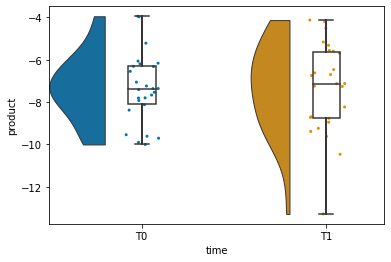

In [85]:
dx = "time"; ort = "v"; pal = 'colorblind'; sigma = .6; viol = .6; mv = .0

pt.RainCloud(x = dx, y = 'product', data = df_noPain,
             palette = pal, bw = sigma, width_viol = viol,
             orient = ort, move = mv)

In [86]:
T0 = df_noPain.loc[df_noPain['time']=='T0']
T1 = df_noPain.loc[df_noPain['time']=='T1']
timepoints = ['T0', 'T1']


t_statistic, pvalue = stats.wilcoxon(T0['product'], T1['product'])
print(t_statistic, round(pvalue, ndigits=4))


132.0 0.2692


In [87]:
#ratio
df_noPain['ratioLS'] = df_noPain['LDLJ_A'] / df_noPain['sampen_res']

<AxesSubplot:xlabel='time', ylabel='ratioLS'>

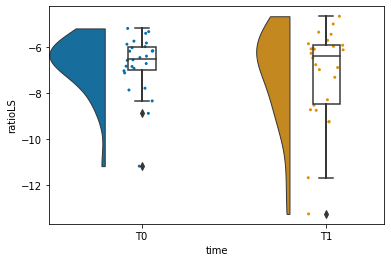

In [88]:
dx = "time"; ort = "v"; pal = 'colorblind'; sigma = .6; viol = .6; mv = .0

pt.RainCloud(x = dx, y = 'ratioLS', data = df_noPain,
             palette = pal, bw = sigma, width_viol = viol,
             orient = ort, move = mv)

In [89]:
T0 = df_noPain.loc[df_noPain['time']=='T0']
T1 = df_noPain.loc[df_noPain['time']=='T1']
timepoints = ['T0', 'T1']


t_statistic, pvalue = stats.wilcoxon(T0['ratioLS'], T1['ratioLS'])
print(t_statistic, round(pvalue, ndigits=4))


121.0 0.1663


<AxesSubplot:xlabel='time', ylabel='prodLL'>

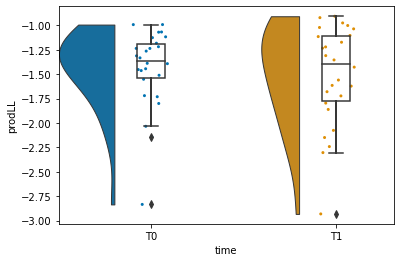

In [90]:
df_noPain['prodLL'] = df_noPain['LDLJ_A'] / df_noPain['rms_res']
dx = "time"; ort = "v"; pal = 'colorblind'; sigma = .6; viol = .6; mv = .0

pt.RainCloud(x = dx, y = 'prodLL', data = df_noPain,
             palette = pal, bw = sigma, width_viol = viol,
             orient = ort, move = mv)

In [91]:
T0 = df_noPain.loc[df_noPain['time']=='T0']
T1 = df_noPain.loc[df_noPain['time']=='T1']
timepoints = ['T0', 'T1']


t_statistic, pvalue = stats.wilcoxon(T0['prodLL'], T1['prodLL'])
print(t_statistic, round(pvalue, ndigits=4))


150.0 0.5172


In [92]:
X = df_noPain.drop(['trial'], axis = 1).reset_index()
X.head()

ppID time  lyapExp_x  lyapExp_y  lyapExp_z  lyapExp_res  sampen_x  \
0  BC_011   T0   3.405026   2.171951   3.706032     4.932879  0.669055   
1  BC_013   T0   5.894997   2.481606   3.474644     2.997241  1.263056   
2  BC_014   T0   3.401100   1.254291   2.422205     2.741568  0.811370   
3  BC_015   T0   2.887995   2.106477   3.688549     0.674435  0.820862   
4  BC_016   T0   1.502497   2.487032   3.376438     2.743834  0.889762   

   sampen_y  sampen_z  sampen_res  ...     rms_y     rms_z   rms_res  \
0  0.625893  0.562903    0.951037  ...  2.773121  2.911987  4.861625   
1  1.213799  0.667468    1.210363  ...  1.144268  2.083361  2.915511   
2  0.720676  0.437278    0.819376  ...  2.507814  4.105837  5.698095   
3  0.761647  0.667571    1.110880  ...  1.382022  2.704464  3.852422   
4  1.003761  0.664440    1.010746  ...  2.206762  3.410972  4.771970   

     rmsr_x    rmsr_y    rmsr_z    LDLJ_A    product   ratioLS    prodLL  
0  0.473781  0.607317  0.637729 -6.483206  -6.165770 -6.816985 -1.333547  
1  0.509693  0.414182  0.754100 -8.265346 -10.004073 -6.828814 -2.834956  
2  0.471277  0.459737  0.752689 -6.369987  -5.219412 -7.774196 -1.117915  
3  0.556153  0.378177  0.740051 -6.628168  -7.363101 -5.966590 -1.720519  
4  0.431642  0.489984  0.757364 -6.985151  -7.060214 -6.910886 -1.463788  

[5 rows x 27 columns]

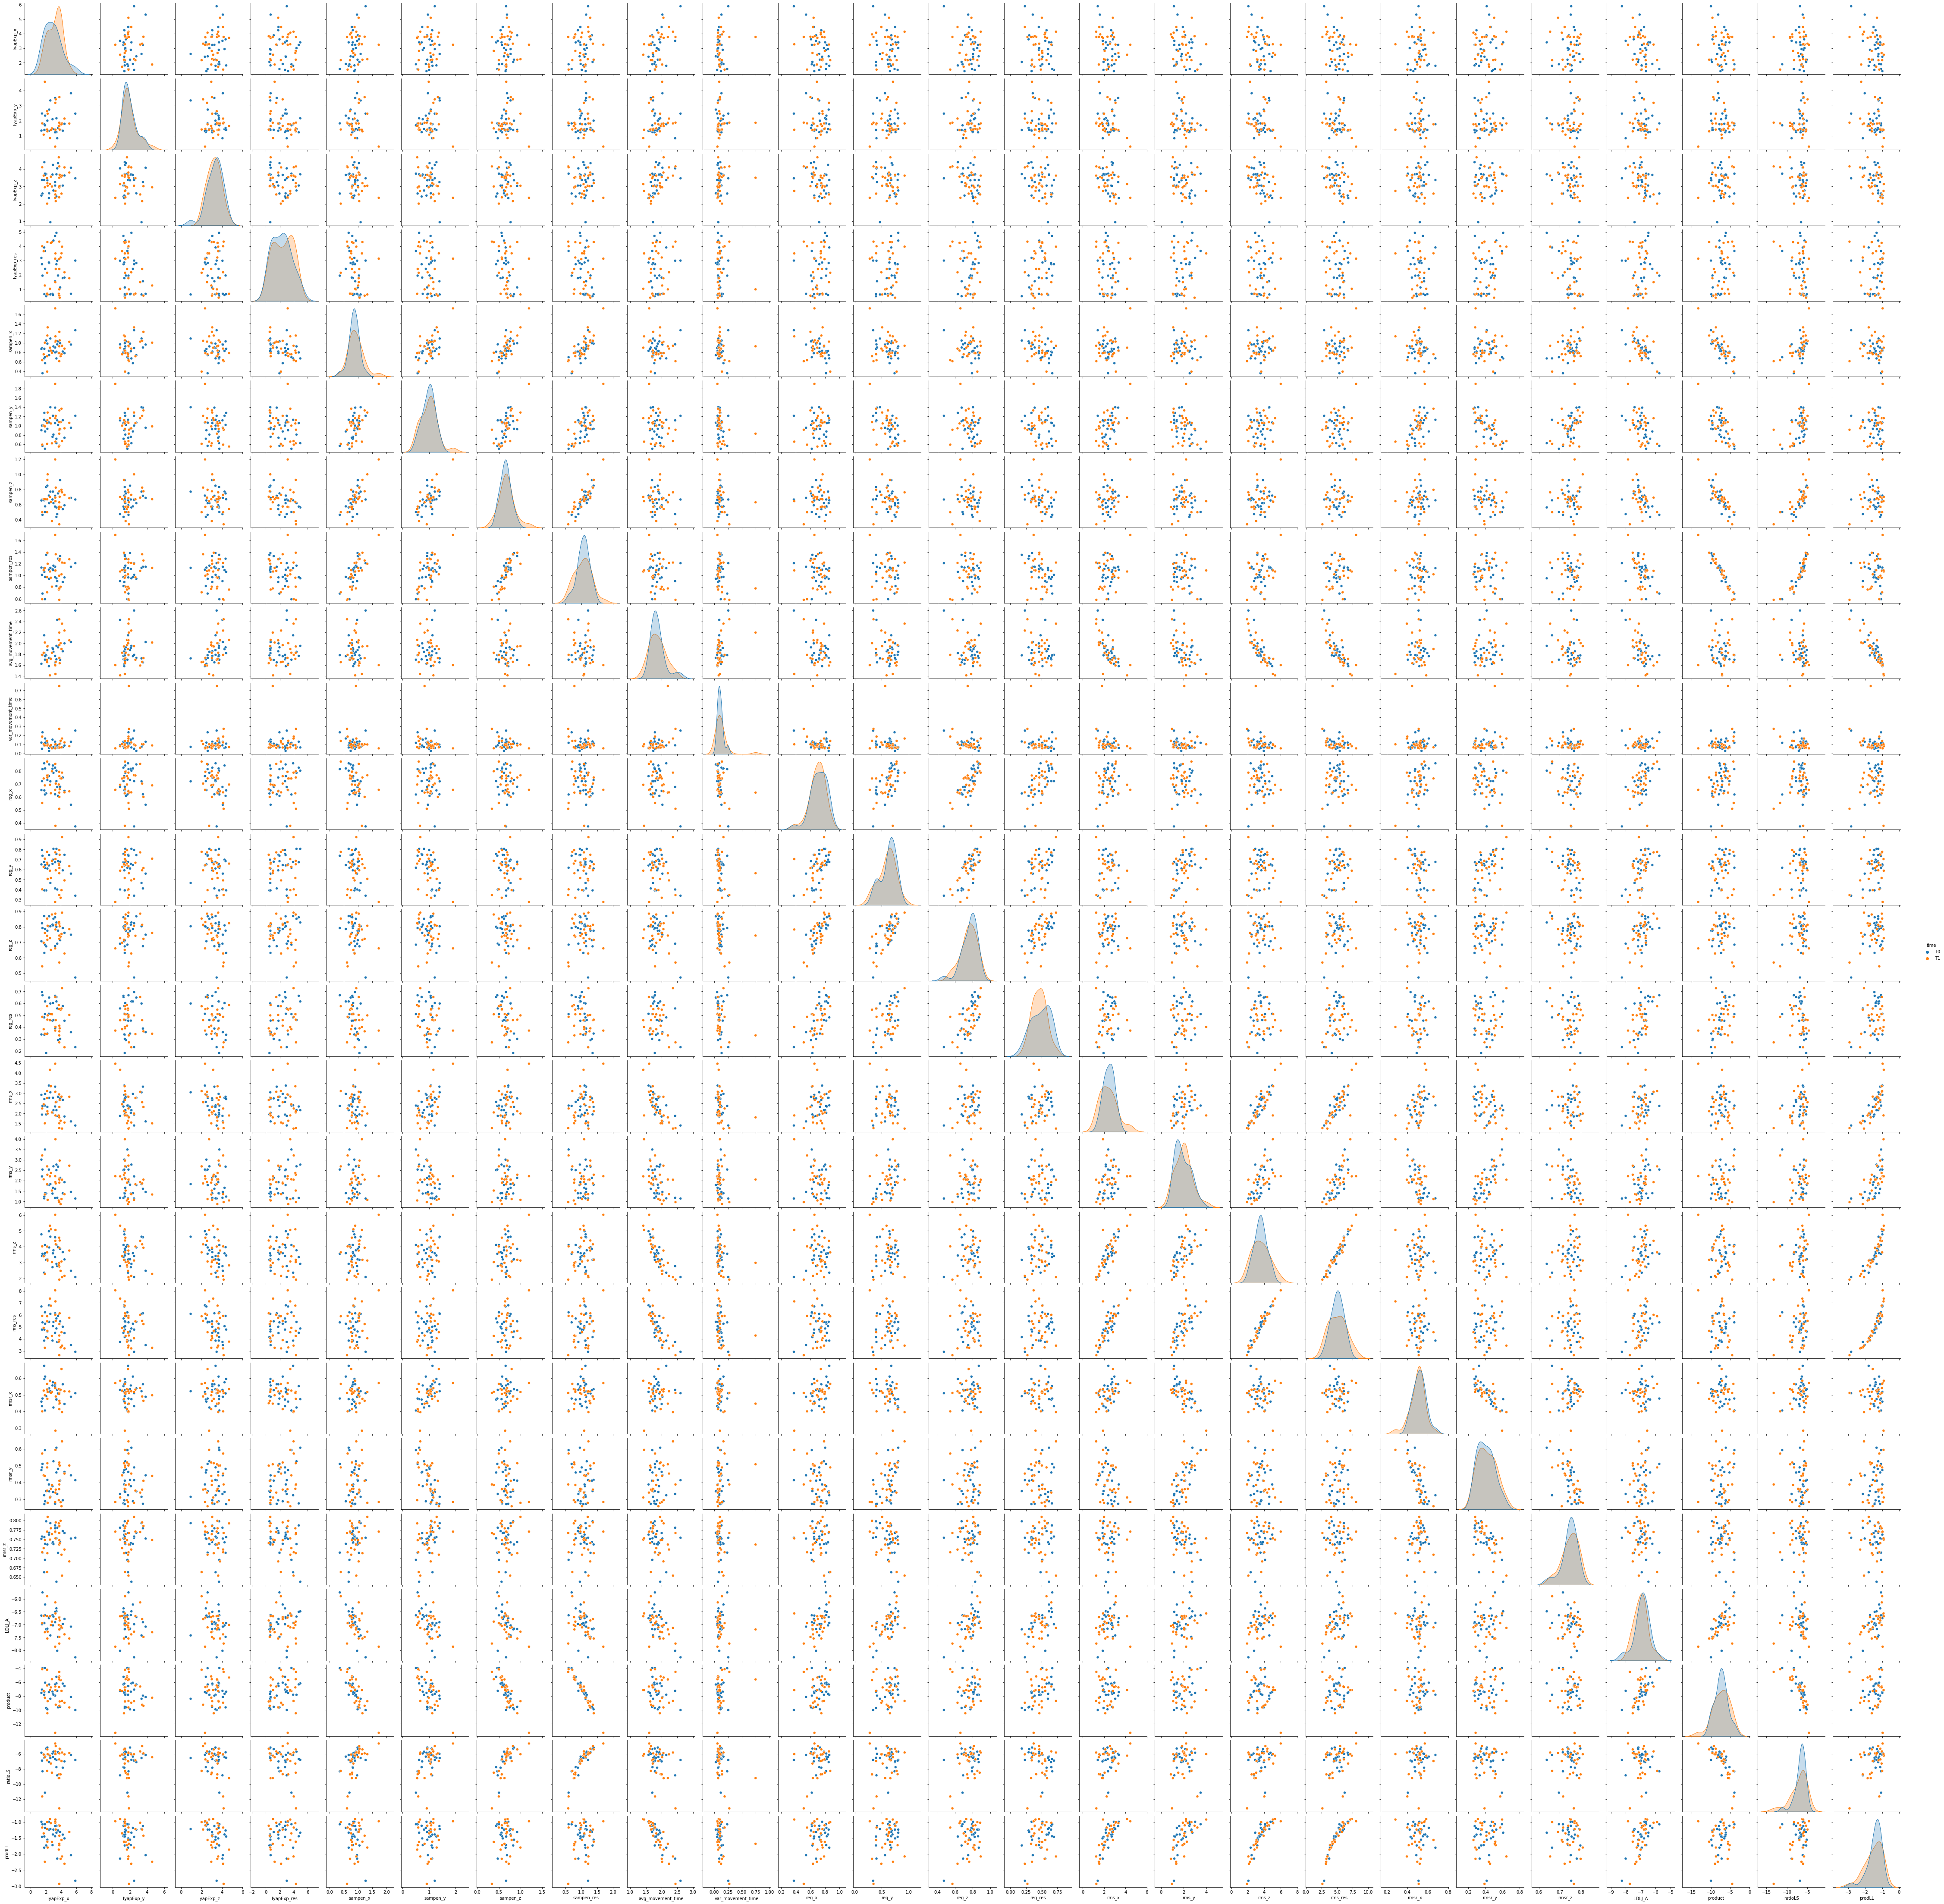

In [93]:
sns.pairplot(X, hue='time')

In [96]:
t1_noPain['ppID']

0     BC_011
1     BC_013
2     BC_014
3     BC_015
4     BC_016
5     BC_017
6     BC_018
7     BC_019
8     BC_023
9     BC_026
10    BC_029
11    BC_031
12    BC_032
13    BC_033
14    BC_034
15    BC_035
16    BC_036
17    BC_037
18    BC_038
19    BC_039
20    BC_041
21    BC_042
22    BC_044
23    BC_045
24    BC_046
25    BC_047
Name: ppID, dtype: object